# Predicting Breast Cancer Diagnosis using Logistic Regression

Our aim in this project is to build a machine learning model to predict the diagnosis of breast cancer cells. Different classification algorithms are usually preferred for machine learning applications. In this study, logistic regression classification algorithm was created and for model evaluation we will consider

- accuracy scores
- recell score
- ROC curve and auc
- F1 Score

We will first apply the algorithm to raw data, then standardized data to learn the effect of standardizing our data for Machine learning purposes. Some demerits of Logistic regression model include

- inability to handle large number of categorical features/variables.
- it is vulnerable to overfitting
- can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features.
- Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

Therefore using the standardized data, four different datasets that included various features were created

- The first dataset will consist of all features
- The second will consist of low correlated features
- The third will consist of highly correlated features
- The last dataset will consist of features selected from REFCV logistic regression. 

We will obtain all model evaluation results for the different datasets to make comparisons.

The steps we will take include

- Split data into train and test sets

- fit an initial machine learning model and evaluate

- Tune hyperparameters

In [1]:
#calling our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,precision_score, recall_score,roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)



**Let's read in the different data**

Here we call the saved data from our previous notebook. We note that data has been cleaned and standardized.

In [2]:
low_cor_df = pd.read_csv("Breast_cancer_data.csv") #data with low correlated features
high_cor_df = pd.read_csv("Breast_cancer_data2.csv") #data with high correlated features
all_features_df = pd.read_csv("scaled_df.csv") #data with all features

**Print shape of data**

In [3]:
print("High correlated dataset has {} features".format(high_cor_df.shape[1])) #diagnosis included
print("Low correlated dataset has {} features".format(low_cor_df.shape[1])) #diagnosis included
print("Dataset (with all features) has {} features".format(all_features_df.shape[1])) 

High correlated dataset has 15 features
Low correlated dataset has 21 features
Dataset (with all features) has 31 features


**Let us take a look at all features**

In [4]:
print("Data with high correlated features")
high_cor_df.columns

Data with high correlated features


Index(['diagnosis', 'perimeter_mean', 'radius_mean', 'area_mean',
       'perimeter_worst', 'radius_worst', 'area_worst', 'perimeter_se',
       'radius_se', 'area_se', 'concavity_mean', 'concave points_mean',
       'concave points_worst', 'texture_mean', 'texture_worst'],
      dtype='object')

In [5]:
print("Data with low correlated features")
low_cor_df.columns

Data with low correlated features


Index(['diagnosis', 'smoothness_mean', 'compactness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'perimeter_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
all_features_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Standardization
Check that features of all data are standardized with zero mean and standard deviation of 1.

First, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [7]:
#check for low correlated dataset
features_low =low_cor_df.drop('diagnosis',axis = 1) #independent feature
target_low = low_cor_df['diagnosis'] #dependent feature

#confirm that feature dataset has standard deviation of 1 and mean of 0
np.mean(features_low.values),np.std(features_low.values)

(9.115926135410776e-17, 1.0)

In [8]:
#check for high correlated dataset
features_high =high_cor_df.drop('diagnosis',axis = 1) #independent feature
target_high = high_cor_df['diagnosis'] #dependent feature

#confirm that feature dataset has standard deviation of 1 and mean of 0
np.mean(features_high.values),np.std(features_high.values)

(132.42331902406477, 319.9329950155204)

In [9]:
#check for dataset with all features
all_features =all_features_df.drop('diagnosis',axis = 1) #independent feature
all_target = all_features_df['diagnosis'] #dependent feature

#confirm that feature dataset has standard deviation of 1 and mean of 0
np.mean(all_features.values),np.std(all_features.values)

(4.370649516977769e-18, 1.0)

## Machine Learning

In this section, we are going to split the data into train and test set in preparation for eliminating redundant features and fitting a basic model. 

To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Here, the Dataset is broken into two parts in a ratio of 70:30. It means 70% data will be used for model training and 30% for model testing.

In [10]:
# split data train 70 % and test 30 %
x_low_train, x_low_test, y_low_train, y_low_test = train_test_split(features_low, target_low, test_size=0.3, random_state=42)



In [11]:
# split data train 70 % and test 30 %
x_high_train, x_high_test, y_high_train, y_high_test = train_test_split(features_high, target_high, test_size=0.3, random_state=42)


In [12]:
# split data train 70 % and test 30 %
x_all_train, x_all_test, y_all_train, y_all_test = train_test_split(all_features, all_target, test_size=0.3, random_state=42)



### Model Development and Prediction

- First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

- Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [13]:
#instantiate modelusing default parameters
lr = LogisticRegression(C = 100) #data not specified are set to default

#fit the model with data
lr.fit(x_low_train, y_low_train) #model learns the relationship between x_train and y_train

#

y_pred = lr.predict(x_low_test) #use information from model to predict a new observation

In [14]:
#instantiate modelusing default parameters
logreg = LogisticRegression(C = 100,max_iter=10000) #data not specified are set to default

#fit the model with data
logreg.fit(x_high_train, y_high_train) #model learns the relationship between x_train and y_train

#

y_pred_high = logreg.predict(x_high_test) #use information from model to predict a new observation

In [15]:
#instantiate modelusing default parameters
logreg_all = LogisticRegression(C = 1) #data not specified are set to default

#fit the model with data
logreg_all.fit(x_all_train, y_all_train) #model learns the relationship between x_train and y_train

#

y_pred_all = logreg_all.predict(x_all_test) #use information from model to predict a new observation

## Evaluating model performance

Ways of evaluating model performance include:

- ROC curve
- F1 Score
- Precision recall
- Accuracy: Correct predictions / Total number of data points

### Confusion matrix

Is a table used to describe the performance of a classification model on a set of test data for which the true values are known.

- used to visualize the performance of an algorithm. 

The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.


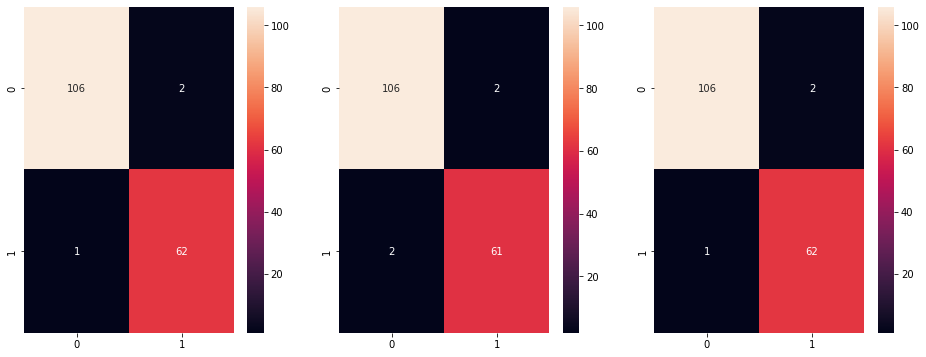

In [16]:
def conf_mat(x,y):
    cm = confusion_matrix(x, y)
    sns.heatmap(cm,annot=True,fmt="d")
    
plt.figure(figsize = (16,6))
plt.subplot(1,3,1)
conf_mat(y_low_test, y_pred)
plt.subplot(1,3,2)
conf_mat(y_high_test, y_pred_high)
plt.subplot(1,3,3)
conf_mat(y_all_test, y_pred_all)

Here we see our two diagnosis classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 106 and 62 are actual predictions, and 2 and 1, or 2 and 2 are incorrect predictions. 

- We notice that all dataset yields equal accurate predictions. The distinction comes from number of inaccurate predictions.

The confusion matrices show how well we are able to predict the breast cancer diagnosis. Dataset with all features and low correlated features give the same confusion matrix. What does this mean? 

### Accuracy, Precision, Recall and F1_Score

In [17]:
ac = accuracy_score(y_low_test, y_pred) # pred returns a numoy array
print('Accuracy is:',ac)
print("Precision:",precision_score(y_low_test, y_pred))
print("Recall:",recall_score(y_low_test, y_pred))
print("F1_Score:",f1_score(y_low_test, y_pred))

Accuracy is: 0.9824561403508771
Precision: 0.96875
Recall: 0.9841269841269841
F1_Score: 0.9763779527559054


In [18]:
ac_high = accuracy_score(y_high_test, y_pred_high) # pred returns a numoy array
print('Accuracy is: ',ac_high)
print("Precision:",precision_score(y_high_test, y_pred_high))
print("Recall:",recall_score(y_high_test, y_pred_high))
print("F1_Score:",f1_score(y_high_test, y_pred_high))

Accuracy is:  0.9766081871345029
Precision: 0.9682539682539683
Recall: 0.9682539682539683
F1_Score: 0.9682539682539683


In [19]:
ac_all = accuracy_score(y_all_test, y_pred_all) # pred returns a numoy array
print('Accuracy is: ',ac_all)
print("Precision:",precision_score(y_all_test, y_pred_all))
print("Recall:",recall_score(y_all_test, y_pred_all))
print("F1_Score:",f1_score(y_all_test, y_pred_all))

Accuracy is:  0.9824561403508771
Precision: 0.96875
Recall: 0.9841269841269841
F1_Score: 0.9763779527559054


### Comment on observation

Overall, we observe a very good performance of the model with all dataset.

- We note that the same score values were obtained for data with all features and with low correlated features. The question then is, does this make a better descrimination for predicting our medical diagnosis of breast cancer tumor? We will compare later with the model evaluation using ROC curce

- We see that the data with high correlated features gave a worst performance a scores.

- Accuracy - Our classification rate for all data is greater than 95%, considered as good accuracy.

- Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. Thus we see that from our Logistic Regression model, we have more than 95% likelihood that if a predicted patients are going to have cancer, that patients have 95% of the time.

- Recall: If there are patients who have cancer in the test set and our Logistic Regression model can identify it more than 95% of the time.

### Receiver Operating Characteristic (ROC)

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR). It shows the tradeoff between sensitivity (TPR) and specificity (1-FPR). 

- Classifiers that give curves closer to the top-left corner indicate a better performance.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- Does not depend on the class distribution. This makes it useful for evaluating classifiers predicting rare events such as diseases or disasters. In contrast, evaluating performance using accuracy would favor classifiers that always predict a negative outcome for rare events

- As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, the areas under ROC curves are used to compare the usefulness of tests.

- AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

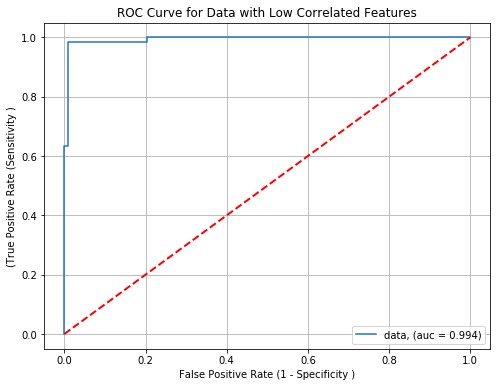

In [20]:
plt.figure(figsize = (8,6))
y_score = lr.decision_function(x_low_test)
fpr, tpr, _ = roc_curve(y_low_test,  y_score)
auc = roc_auc_score(y_low_test, y_score)
plt.plot(fpr,tpr,label="data, (auc = %0.3f)" % auc)
plt.plot([0,1],[0,1], 'r--', linewidth = 2)
plt.legend(loc=4)
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity )')
plt.ylabel('(True Positive Rate (Sensitivity )')
plt.title('ROC Curve for Data with Low Correlated Features')
plt.show()

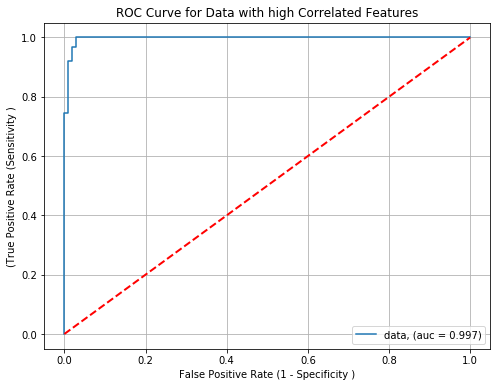

In [21]:
plt.figure(figsize = (8,6))

y_score_high = logreg.decision_function(x_high_test)
fpr, tpr, _ = roc_curve(y_high_test,  y_score_high)
auc = roc_auc_score(y_high_test, y_score_high)
plt.plot(fpr,tpr,label="data, (auc = %0.3f)" % auc)
plt.plot([0,1],[0,1], 'r--', linewidth = 2)
plt.legend(loc=4)
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity )')
plt.ylabel('(True Positive Rate (Sensitivity )')
plt.title('ROC Curve for Data with high Correlated Features')
plt.show()

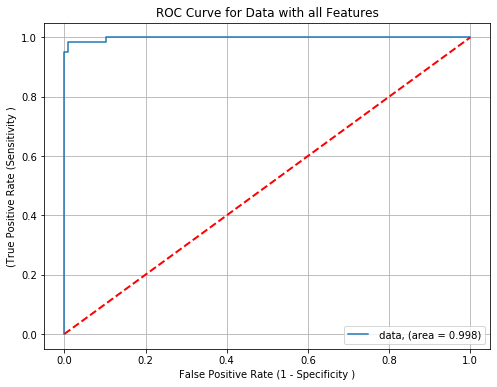

In [22]:
plt.figure(figsize = (8,6))
y_score_all = logreg_all.decision_function(x_all_test)
fpr, tpr, _ = roc_curve(y_all_test,  y_score_all)
auc = roc_auc_score(y_all_test, y_score_all)
plt.plot(fpr,tpr,label=" data, (area = %0.3f)" % auc)
plt.plot([0,1],[0,1], 'r--', linewidth = 2)
plt.legend(loc=4)
plt.grid()
plt.xlabel('False Positive Rate (1 - Specificity )')
plt.ylabel('(True Positive Rate (Sensitivity )')
plt.title('ROC Curve for Data with all Features')
plt.show()

We get the best AUC score using data with all features, and worst AUC using low correlated data. 

## Summary/ Conclusion

logistic regression with all features included and with low correlated features provided the best accuracy, F1_Score, Recall and Precision results respectively, compared to logistic regression with high correlated features. However, when we look at the ROC curve, we see that logistic regression with all features has the highest auc (area under the roc curve) of 0.998, while logistic regression with low features yielded the lowest auc of 0.994.

Therefore, to conclude, logistic regression with all features provide the best model for predicting the diagnosis of breast cancer cells.